<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>


### Introduction

Welcome to Boston Massachusetts in the 1970s!. We are building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.


In [5]:
data.head()

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  PRICE  
0   4.98  24.00  
1   9.14  21.60  
2   4.03  34.70  
3   2.94  33.40  
4   5.33  36.20

In [6]:
data.shape

(506, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [8]:
print(f"Any null values: {data.isnull().values.any()}")

Any null values: False


In [9]:
data.tail()

CRIM   ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
501  0.06 0.00  11.93  0.00 0.57 6.59 69.10 2.48 1.00 273.00    21.00 391.99   
502  0.05 0.00  11.93  0.00 0.57 6.12 76.70 2.29 1.00 273.00    21.00 396.90   
503  0.06 0.00  11.93  0.00 0.57 6.98 91.00 2.17 1.00 273.00    21.00 396.90   
504  0.11 0.00  11.93  0.00 0.57 6.79 89.30 2.39 1.00 273.00    21.00 393.45   
505  0.05 0.00  11.93  0.00 0.57 6.03 80.80 2.50 1.00 273.00    21.00 396.90   

     LSTAT  PRICE  
501   9.67  22.40  
502   9.08  20.60  
503   5.64  23.90  
504   6.48  22.00  
505   7.88  11.90

In [10]:
print(f"Any suplicate values: {data.duplicated().values.any()}")

Any suplicate values: False


## Descriptive Statistics



In [11]:
data.describe()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23  16.96  25.00  
max      22.00 396.90  37.97  50.00

In [12]:
print(f"students are there per teacher on average: {round(data.PTRATIO.mean(),2)}")

students are there per teacher on average: 18.46


In [13]:
print(f"Average price of a home: ${round(data.PRICE.mean(),2)*1000}")

Average price of a home: $22530.0


**data.CHAS**  IS a dummy variable, where 1: The tract or area borders the Charles River (i.e., it is near or on the riverbank).
0: The tract or area does not border the Charles River.

In [14]:
print(f"Properties near charles river :{data[data.CHAS==1.00]['CHAS'].count()}")
data.CHAS.value_counts()

Properties near charles river :35


0.00    471
1.00     35
Name: CHAS, dtype: int64

## Visualise the Features



#### House Prices

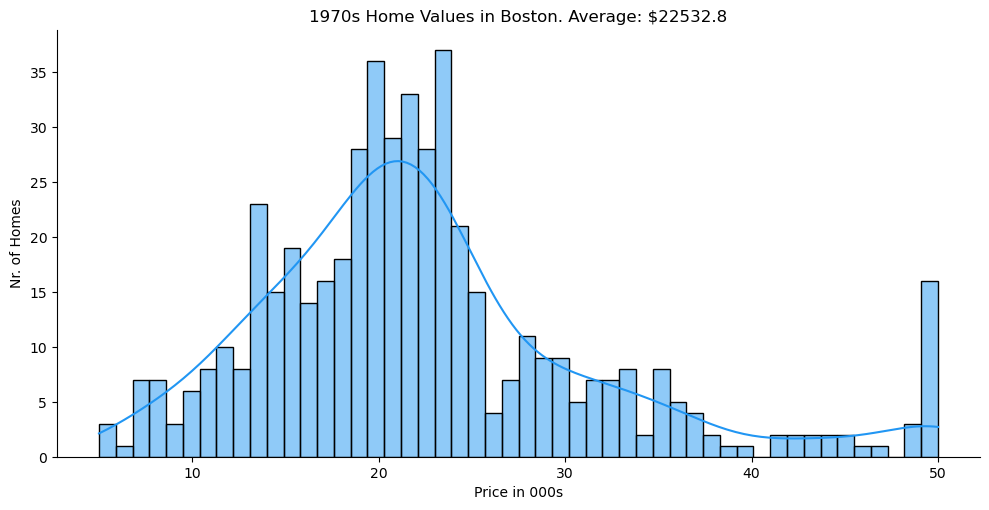

In [15]:
sns.displot(data['PRICE'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')
plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')
plt.show()

#### Distance to Employment - Length of Commute

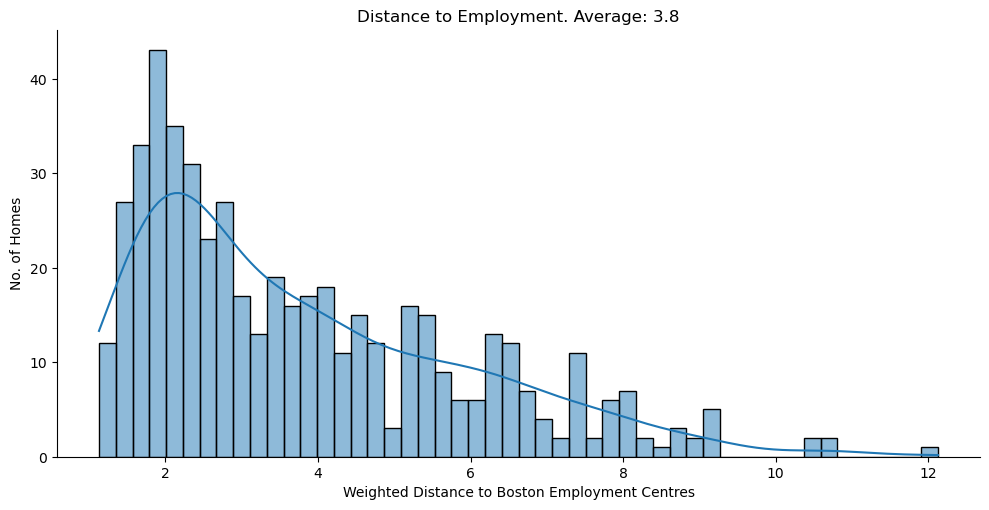

In [16]:
sns.displot(data.DIS,
            bins=50,
            aspect=2,
           kde=True)
plt.title(f'Distance to Employment. Average: {round(data.DIS.mean(),2)}')
plt.xlabel("Weighted Distance to Boston Employment Centres")
plt.ylabel("No. of Homes")
plt.show()

#### Number of Rooms

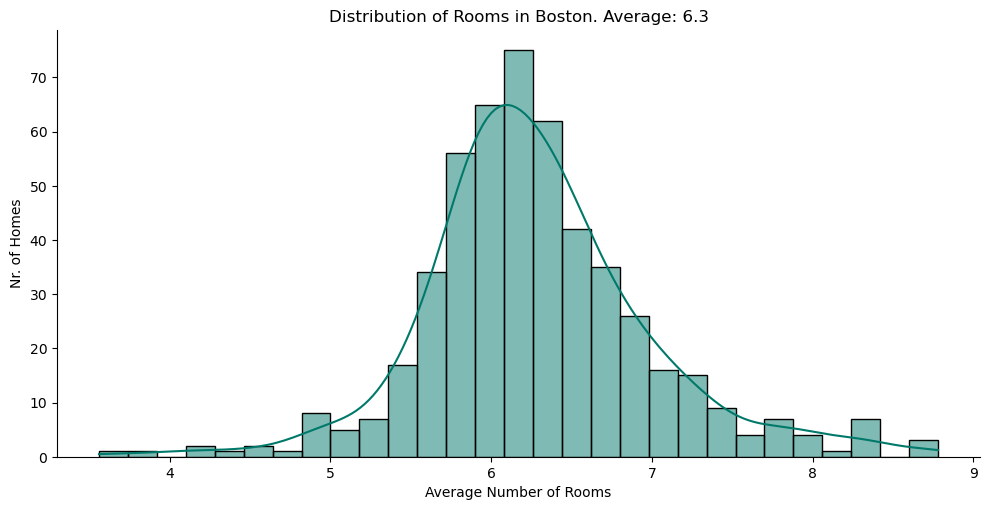

In [17]:
sns.displot(data.RM,
            aspect=2,
            kde=True,
            color='#00796b')
plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')
plt.show()

#### Access to Highways

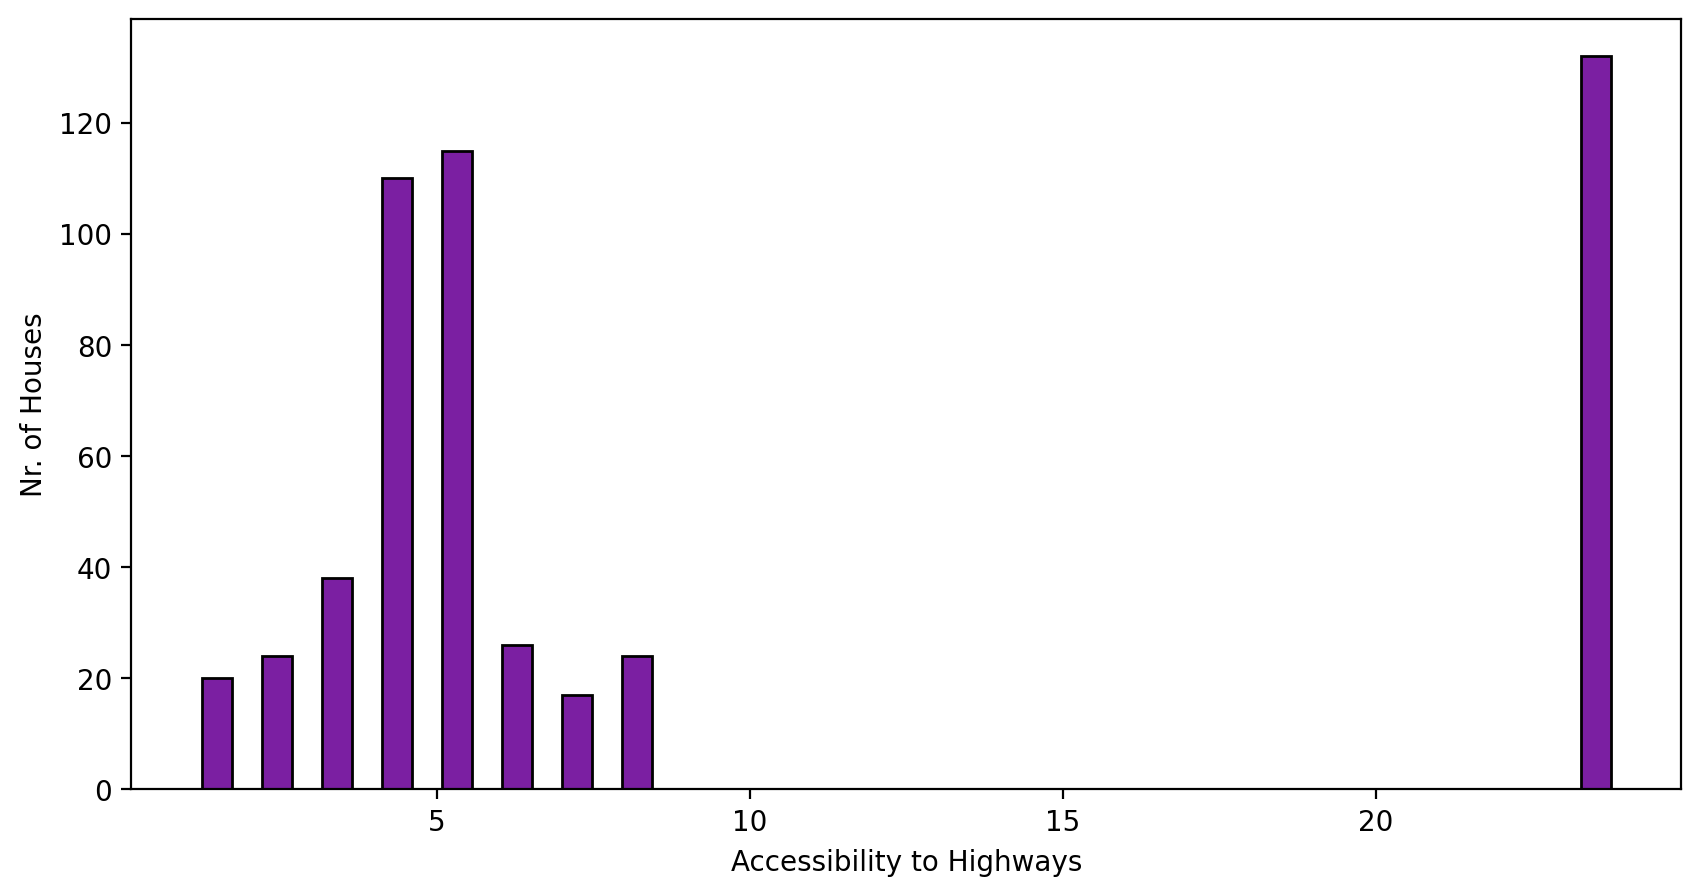

In [18]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

#### Next to the River? 

In [19]:
river_access=data['CHAS'].value_counts()
river_access
bar=px.bar(x=('No','Yes'),
      y=river_access.values,
       color=river_access.values,
       color_continuous_scale=px.colors.sequential.solar 
      )
bar.update_layout(title='Next to Charles River?',
                  xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understanding the Relationships in the Data

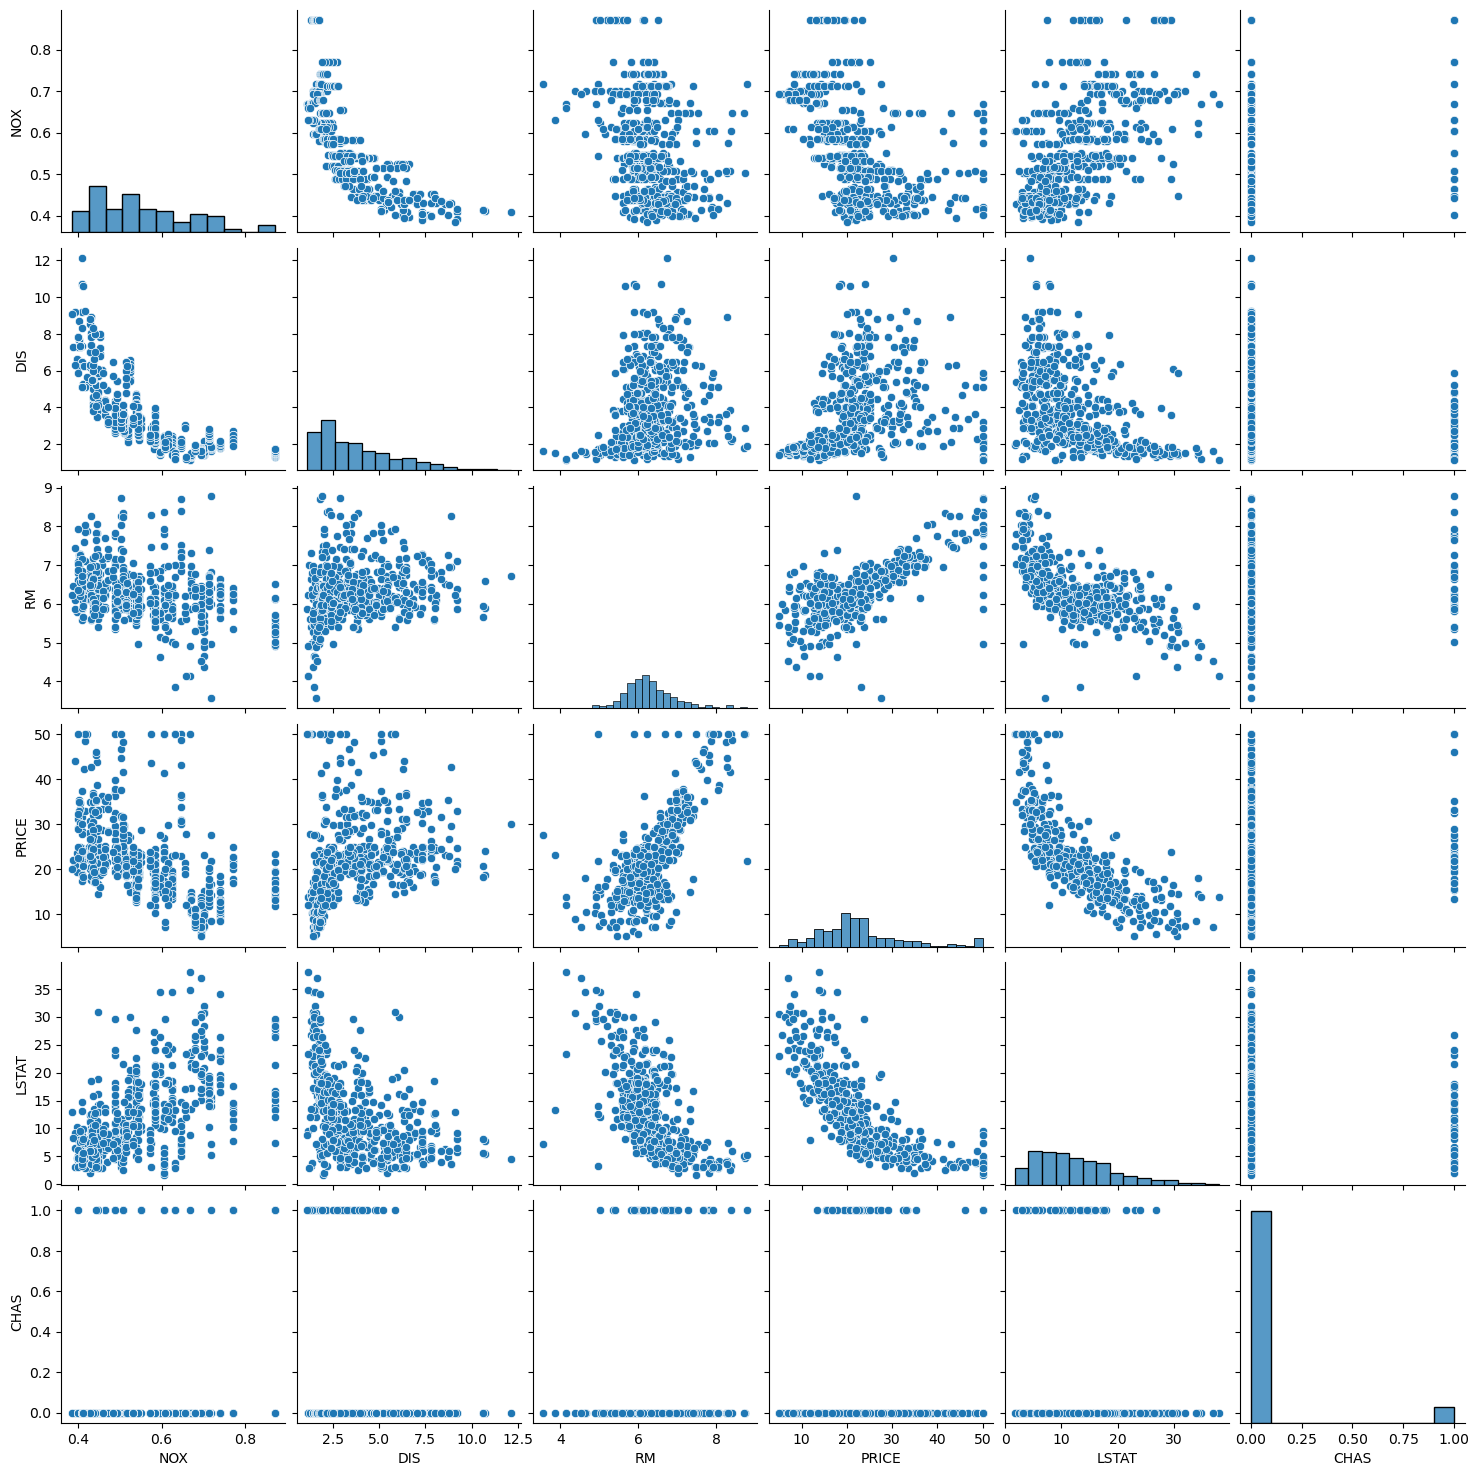

In [20]:
col=['NOX','DIS','RM','PRICE','LSTAT','CHAS']
sns.pairplot(data[col])
plt.show()

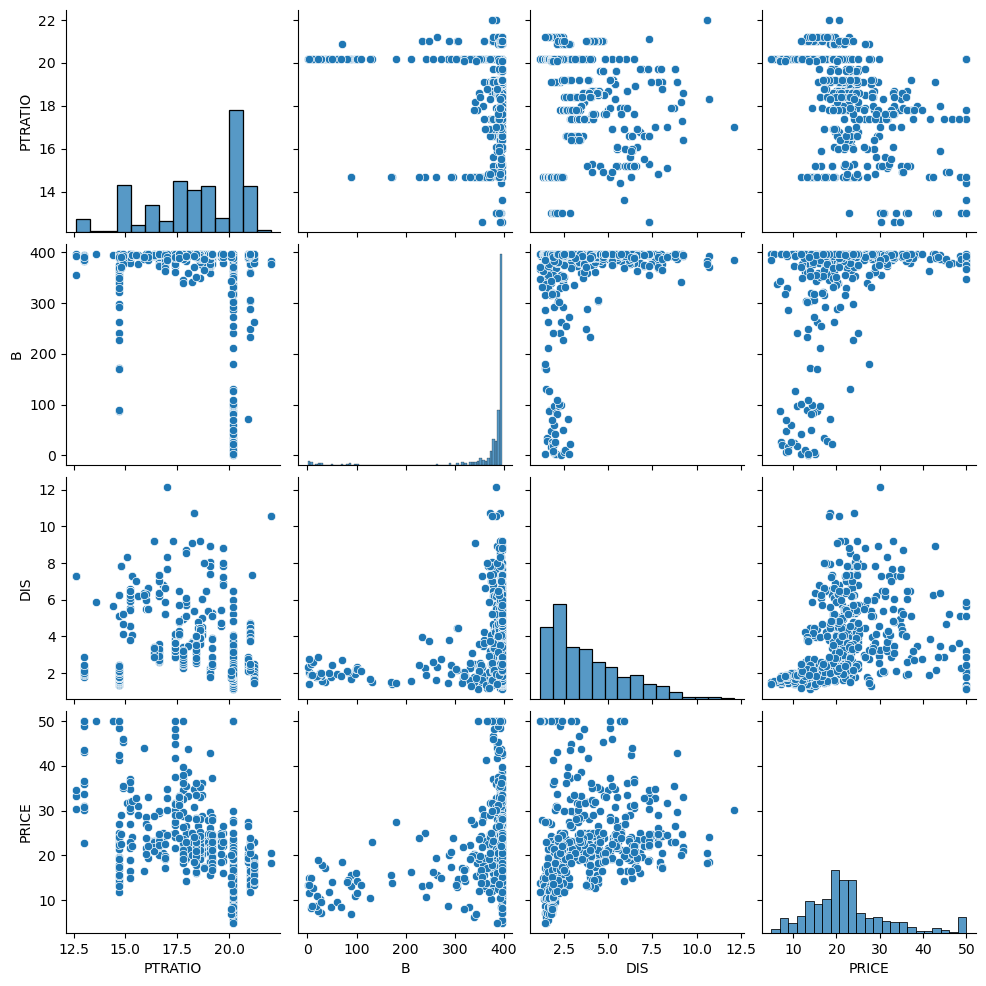

In [21]:
col=['PTRATIO','B','DIS','PRICE']
sns.pairplot(data[col])
plt.show()


Using [Seaborn's `.jointplot()`]to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution



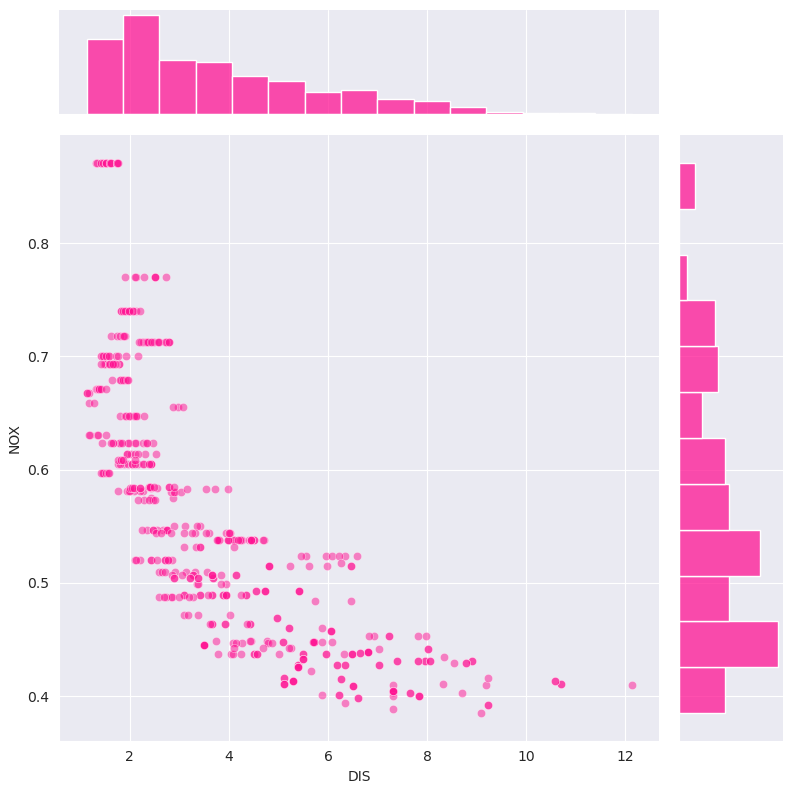

In [22]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Proportion of Non-Retail Industry  versus Pollution 


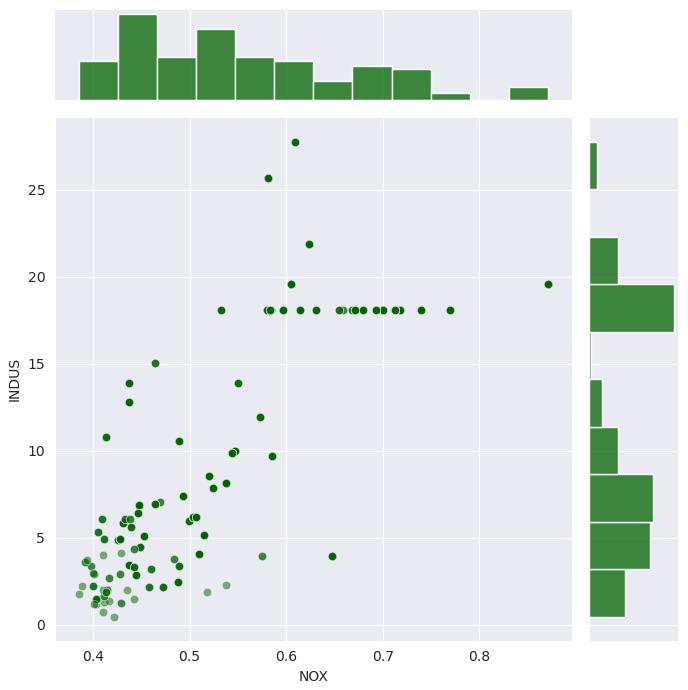

In [23]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX, 
                y=data.INDUS, 
               
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms



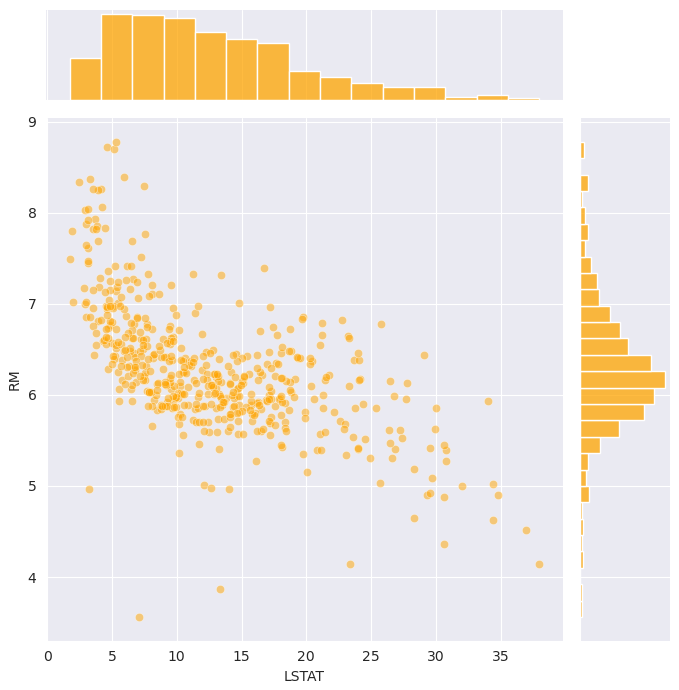

In [24]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.RM, 
               
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population versus Home Price



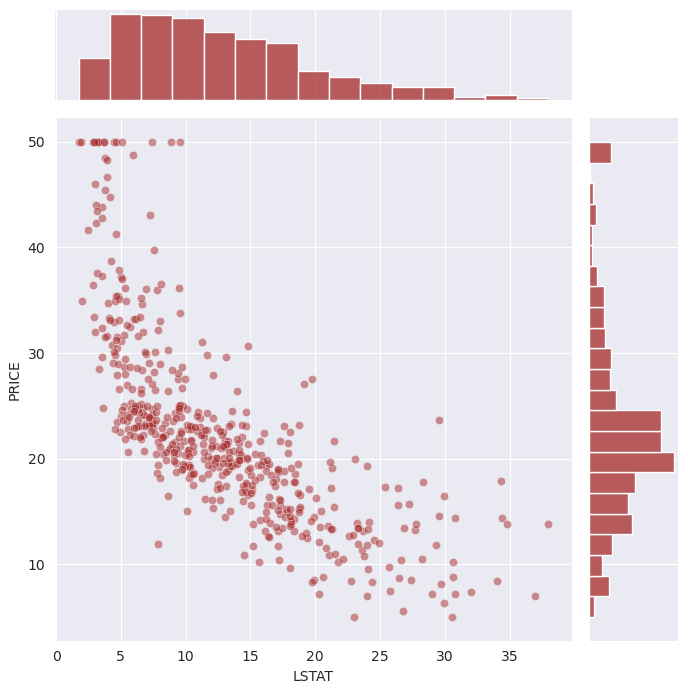

In [25]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
               
                height=7, 
                color='brown',
                joint_kws={'alpha':0.5})
plt.show()

#### Number of Rooms versus Home Value



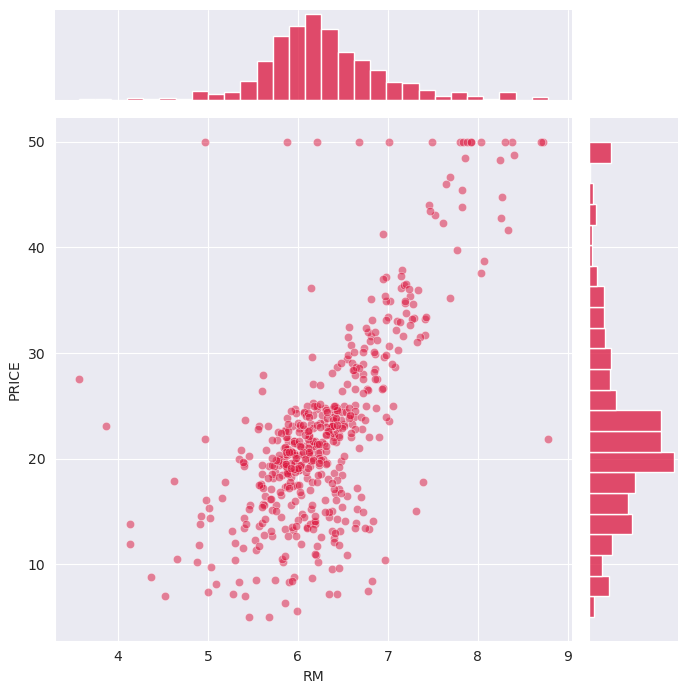

In [26]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.RM, 
                y=data.PRICE, 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 

* Import the [`train_test_split()` function] from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* To get the same random split every time we use `random_state=10`. This helps us get the same results every time and avoid confusion.


In [27]:
target=data['PRICE']
features=data.drop('PRICE',axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2,  random_state=10)


In [28]:
# Training set
train_pct=100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')


Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Runing First Regression

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [29]:
regr=LinearRegression()
regr.fit(X_train,y_train)
rsquared=regr.score(X_train,y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


The value of r-squared is a good fit.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 



In [30]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

Coefficient
CRIM           -0.13
ZN              0.06
INDUS          -0.01
CHAS            1.97
NOX           -16.27
RM              3.11
AGE             0.02
DIS            -1.48
RAD             0.30
TAX            -0.01
PTRATIO        -0.82
B               0.01
LSTAT          -0.58

In [31]:
premium = regr_coef.loc['RM'].values[0] * 1000  
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


Positive coefficients (CHAS, RM, ZN, RAD, B) indicate that as the feature increases, the house price tends to increase.               
Negative coefficients (CRIM, NOX, TAX,PTRATIO,LSTAT,DIS) indicate that as the feature increases, the house price tends to decrease.

### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```


In [32]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

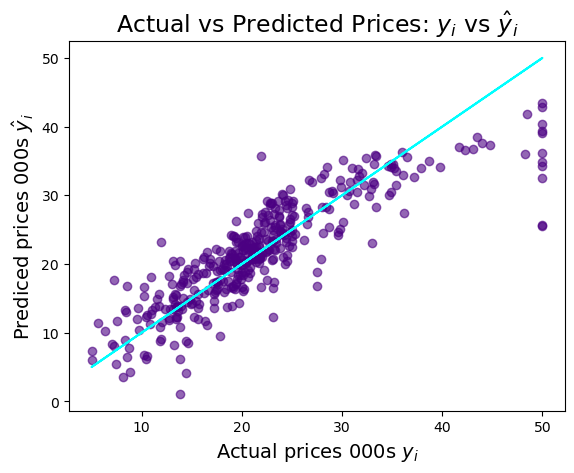

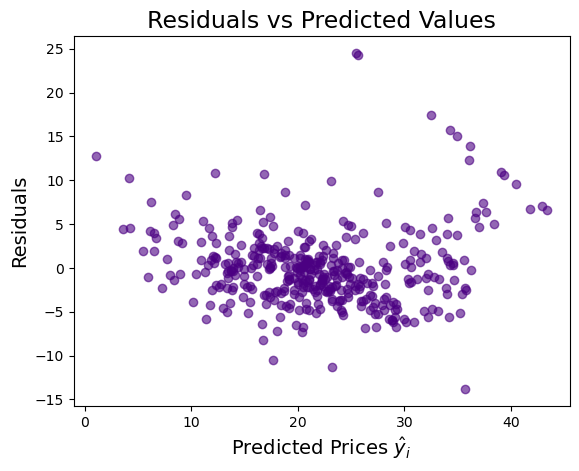

In [33]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

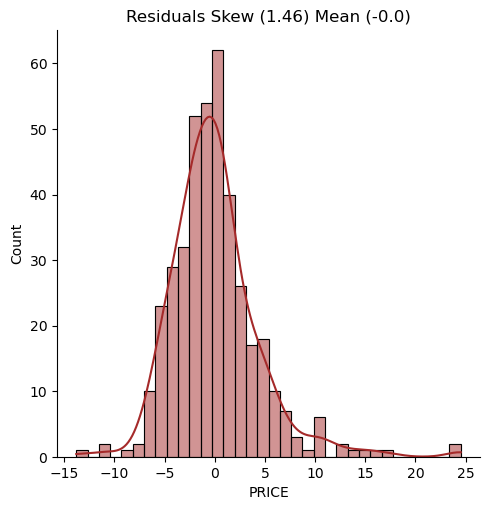

In [34]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='brown')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 



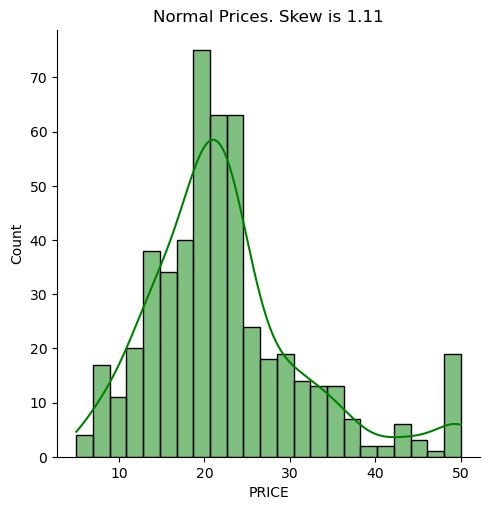

In [35]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

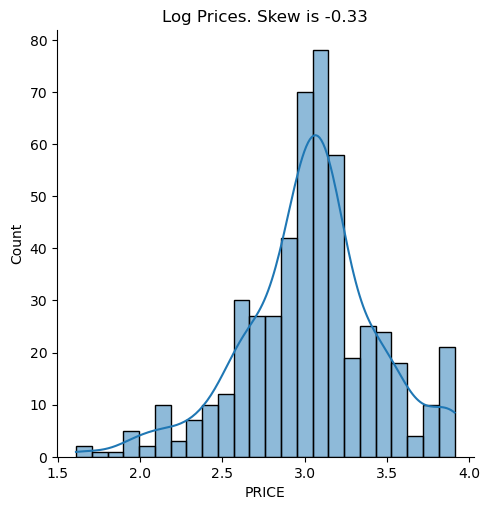

In [36]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

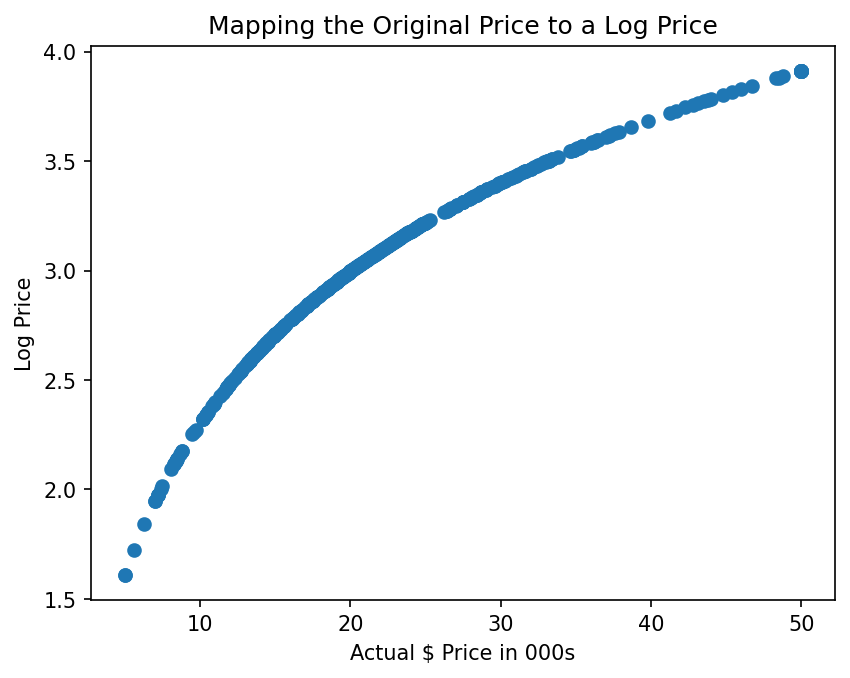

In [37]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

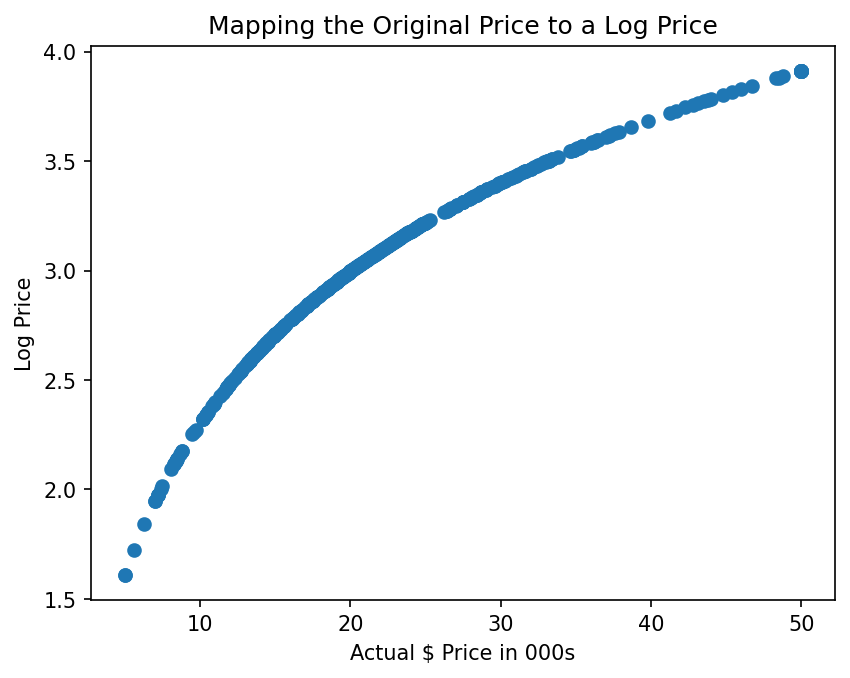

In [38]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


In [39]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)
X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


This time we got an r-squared of 0.79 compared to 0.75.

## Evaluating Coefficients with Log Prices



In [41]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

coef
CRIM    -0.01
ZN       0.00
INDUS    0.00
CHAS     0.08
NOX     -0.70
RM       0.07
AGE      0.00
DIS     -0.05
RAD      0.01
TAX     -0.00
PTRATIO -0.03
B        0.00
LSTAT   -0.03

## Regression with Log Prices & Residual Plots



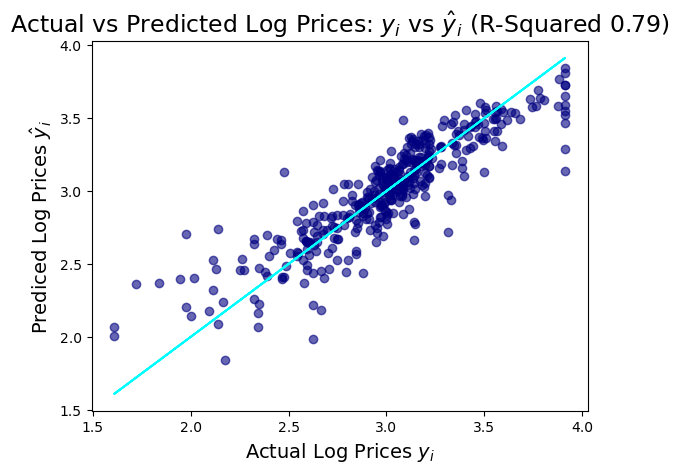

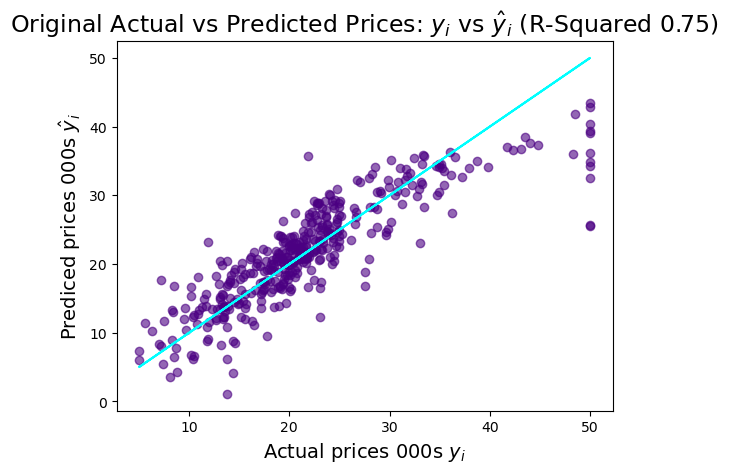

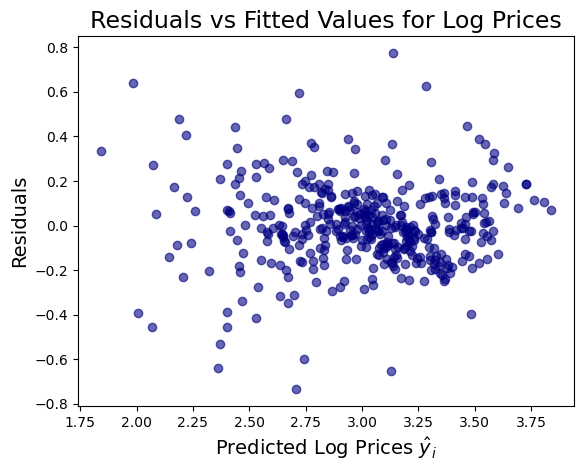

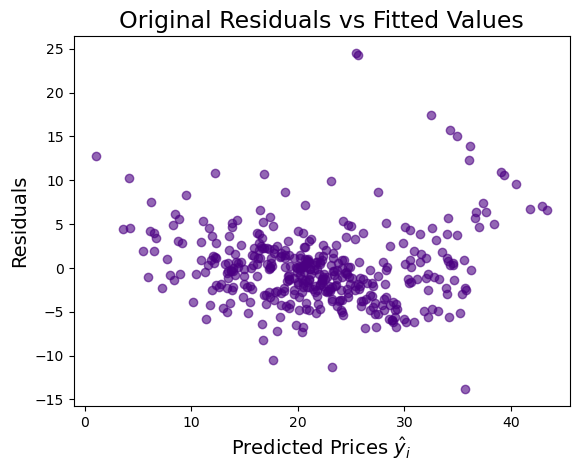

In [42]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

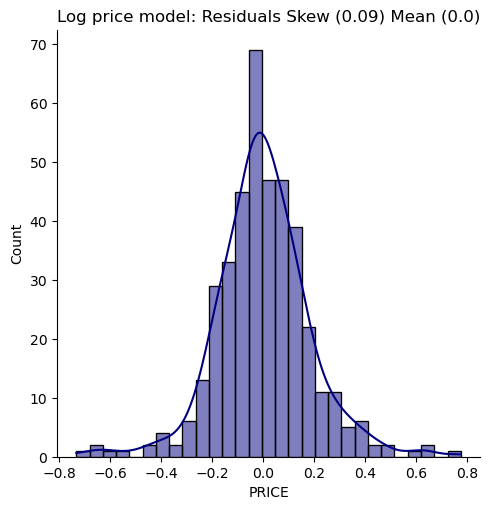

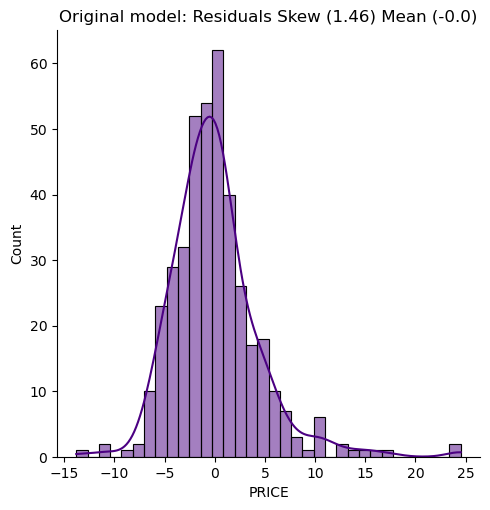

In [43]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation. 

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 


In [44]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [45]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  
0  12.65

In [59]:

log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.58
The property is estimated to be worth $35868.9



Keeping the  values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [60]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 9
students_per_classroom = 14 
distance_to_town = 4
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [61]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [62]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.58
The property is estimated to be worth $35868.9
